<a href="https://colab.research.google.com/github/kkobug222/python/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***중력렌즈여부 판단 딥러닝***


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6905 - val_accuracy: 0.3333 - val_loss: 0.9404
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7500 - loss: 0.5786 - val_accuracy: 0.6667 - val_loss: 0.6611
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.5000 - loss: 0.7820 - val_accuracy: 0.6667 - val_loss: 0.6299
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 1.0000 - loss: 0.3620 - val_accuracy: 0.3333 - val_loss: 1.0949
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8750 - loss: 0.4674 - val_accuracy: 0.3333 - val_loss: 0.6978
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8750 - loss: 0.2713 - val_accuracy: 0.6667 - val_loss: 0.5426
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 1.0000 - loss: 0.2244 - val_accuracy: 0.6667 - val_loss: 0.5312
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 1.0000 - loss: 0.1964 - val_accuracy: 1.0000 - val_loss: 0.4903
Epoch 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


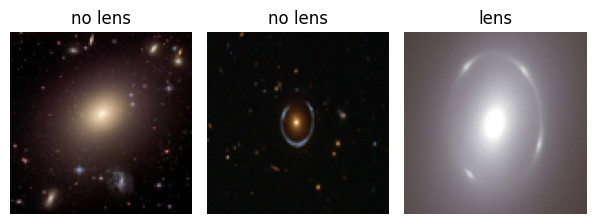

In [ ]:

import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터
os.makedirs("dataset/lens", exist_ok=True)
os.makedirs("dataset/no_lens", exist_ok=True)

# 이미지
lens_urls = [
    "https://www.sciencetimes.co.kr/jnrepo/uploads/2015/04/Einstein_cross.jpg",
    "https://mblogthumb-phinf.pstatic.net/MjAyMDAxMjNfMjA0/MDAxNTc5NzQ4MjEzNjc3.pa19YNiTKA6M8sTZWv5C-iT5IVJbt3Qs_yFkwH709dog.F6UvNr3V-dGM9jgvS4LBGzPQCWWiH_fFa-QizGDDYxAg.JPEG.with_msip/1.jpg?type=w800",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0YOnN73GtEaKV7gzSexu-MPTebLYuVRWVEQ&s",
    "https://www.busan.com/nas/data/content/image/2003/07/11/20030711000234_0.jpg",
    "https://file2.nocutnews.co.kr/newsroom/image/2025/02/28/202502281719161056_0.jpg"
]

no_lens_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/4/4f/Artist%E2%80%99s_impression_of_the_Milky_Way.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3N1MxCPdgwt0aYQtrPLzNnOid4L6b37Zhxw&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgbGoTi5sY4r0OfpMEA8cHqF7VfI-GA9hUDbunnsKZU_olXckRJjwd_IROtoiaTLNJ8Ks&usqp=CAU",
    "https://cdn.popsci.co.kr/news/photo/202211/20214_10240_5345.jpg",
    "https://cdn.huffingtonpost.kr/news/photo/202207/119831_235601.jpg"
]

def download_image(url, filepath):
    req = urllib.request.Request(
        url,
        data=None,
        headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
        }
    )
    with urllib.request.urlopen(req) as response, open(filepath, 'wb') as out_file:
        out_file.write(response.read())

for i, url in enumerate(lens_urls):
    urllib.request.urlretrieve(url, f"dataset/lens/{i}.jpg")

for i, url in enumerate(no_lens_urls):
    urllib.request.urlretrieve(url, f"dataset/no_lens/{i}.jpg")


# 이미지 불러오기
def load_images(folder, label, img_size=(100, 100)):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert("RGB")
            img = img.resize(img_size)
            data.append((np.array(img) / 255.0, label))
    return data

lens_data = load_images("dataset/lens", label=1)
no_lens_data = load_images("dataset/no_lens", label=0)

all_data = lens_data + no_lens_data
np.random.shuffle(all_data)

X = np.array([x for x, _ in all_data])
y = np.array([y for _, y in all_data])

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 모델
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 이진 분류
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


#모델 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


#정확도 출력
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")


print("y_test 클래스 분포:", np.bincount(y_test))

for i in range(min(5, len(X_test))):
    actual_label = "lens" if y_test[i] == 1 else "no lens"
    pred_label = "lens" if preds[i] > 0.5 else "no lens"
    print(f"실제: {actual_label}, 예측: {pred_label}, 확률: {preds[i][0]:.3f}")




#시각화
preds = model.predict(X_test)

plt.figure(figsize=(10, 4))
for i in range(min(5, len(X_test))):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    pred_label = "lens" if preds[i] > 0.5 else "no lens"
    plt.title(pred_label)
plt.tight_layout()
plt.show()


In [ ]:
import urllib.request

urls = [
    "https://www.sciencetimes.co.kr/jnrepo/uploads/2015/04/Einstein_cross.jpg",
    "https://mblogthumb-phinf.pstatic.net/MjAyMDAxMjNfMjA0/MDAxNTc5NzQ4MjEzNjc3.pa19YNiTKA6M8sTZWv5C-iT5IVJbt3Qs_yFkwH709dog.F6UvNr3V-dGM9jgvS4LBGzPQCWWiH_fFa-QizGDDYxAg.JPEG.with_msip/1.jpg?type=w800",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0YOnN73GtEaKV7gzSexu-MPTebLYuVRWVEQ&s",
    "https://www.busan.com/nas/data/content/image/2003/07/11/20030711000234_0.jpg",
    "https://img2.yna.co.kr/etc/inner/KR/2021/08/26/AKR20210826077100009_01_i_P4.jpg",
    "https://file2.nocutnews.co.kr/newsroom/image/2025/02/28/202502281719161056_0.jpg"
]

for i, url in enumerate(urls):
    try:
        urllib.request.urlretrieve(url, f"image_{i}.jpg")
        print(f"다운로드 성공: {url}")
    except Exception as e:
        print(f"다운로드 실패: {url}")
        print("오류 메시지:", e)


다운로드 성공: https://www.sciencetimes.co.kr/jnrepo/uploads/2015/04/Einstein_cross.jpg
다운로드 성공: https://mblogthumb-phinf.pstatic.net/MjAyMDAxMjNfMjA0/MDAxNTc5NzQ4MjEzNjc3.pa19YNiTKA6M8sTZWv5C-iT5IVJbt3Qs_yFkwH709dog.F6UvNr3V-dGM9jgvS4LBGzPQCWWiH_fFa-QizGDDYxAg.JPEG.with_msip/1.jpg?type=w800
다운로드 성공: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0YOnN73GtEaKV7gzSexu-MPTebLYuVRWVEQ&s
다운로드 성공: https://www.busan.com/nas/data/content/image/2003/07/11/20030711000234_0.jpg
다운로드 실패: https://img2.yna.co.kr/etc/inner/KR/2021/08/26/AKR20210826077100009_01_i_P4.jpg
오류 메시지: <urlopen error [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1016)>
다운로드 성공: https://file2.nocutnews.co.kr/newsroom/image/2025/02/28/202502281719161056_0.jpg


In [ ]:
import urllib.request

urls = [
    "https://i.namu.wiki/i/ZW1uAAetOWfBWQGJBklHfyWXCIM-_gOUAqYrQlqTlGQQGKtdSyZA7LVQNLuYNpy9dW4vyOTpLlgwiot_TWl1IQ.webp",
    "https://upload.wikimedia.org/wikipedia/commons/4/4f/Artist%E2%80%99s_impression_of_the_Milky_Way.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3N1MxCPdgwt0aYQtrPLzNnOid4L6b37Zhxw&s",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgbGoTi5sY4r0OfpMEA8cHqF7VfI-GA9hUDbunnsKZU_olXckRJjwd_IROtoiaTLNJ8Ks&usqp=CAU",
    "https://cdn.popsci.co.kr/news/photo/202211/20214_10240_5345.jpg",
    "https://cdn.huffingtonpost.kr/news/photo/202207/119831_235601.jpg"
]

for i, url in enumerate(urls):
    try:
        urllib.request.urlretrieve(url, f"image_{i}.jpg")
        print(f"다운로드 성공: {url}")
    except Exception as e:
        print(f"다운로드 실패: {url}")
        print("오류 메시지:", e)


다운로드 실패: https://i.namu.wiki/i/ZW1uAAetOWfBWQGJBklHfyWXCIM-_gOUAqYrQlqTlGQQGKtdSyZA7LVQNLuYNpy9dW4vyOTpLlgwiot_TWl1IQ.webp
오류 메시지: HTTP Error 403: Forbidden
다운로드 성공: https://upload.wikimedia.org/wikipedia/commons/4/4f/Artist%E2%80%99s_impression_of_the_Milky_Way.jpg
다운로드 성공: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3N1MxCPdgwt0aYQtrPLzNnOid4L6b37Zhxw&s
다운로드 성공: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgbGoTi5sY4r0OfpMEA8cHqF7VfI-GA9hUDbunnsKZU_olXckRJjwd_IROtoiaTLNJ8Ks&usqp=CAU
다운로드 성공: https://cdn.popsci.co.kr/news/photo/202211/20214_10240_5345.jpg
다운로드 성공: https://cdn.huffingtonpost.kr/news/photo/202207/119831_235601.jpg
